In [20]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix,silhouette_score
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/processed_data.csv')

In [3]:
kmdf = df.loc[:,['tenure','monthlycharges']]
kmdf.head()

,tenure,monthlycharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70


In [4]:
# scale data
scale = StandardScaler()
scale.fit(kmdf)
scaled_data_array = scale.transform(kmdf)
scaled_data = pd.DataFrame(scaled_data_array,columns = kmdf.columns)
scaled_data.head()

,tenure,monthlycharges
0,-1.277445,-1.160323
1,0.066327,-0.259629
2,-1.236724,-0.362660
3,0.514251,-0.746535
4,-1.236724,0.197365


In [5]:
# export to csv
scaled_data.to_csv('data/kmean_scaled_data.csv')

Elbow Method

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

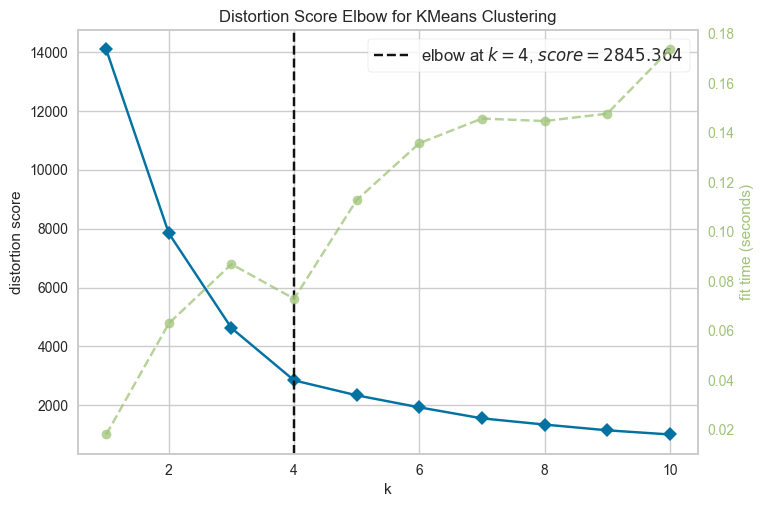

In [21]:
vis_model = KMeans(random_state=1)
visualizer = KElbowVisualizer(vis_model,k=(1,11))
visualizer.fit(scaled_data)
visualizer.show()
plt.show()

The graph above suggest that 4 clusters is an optimal choice

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


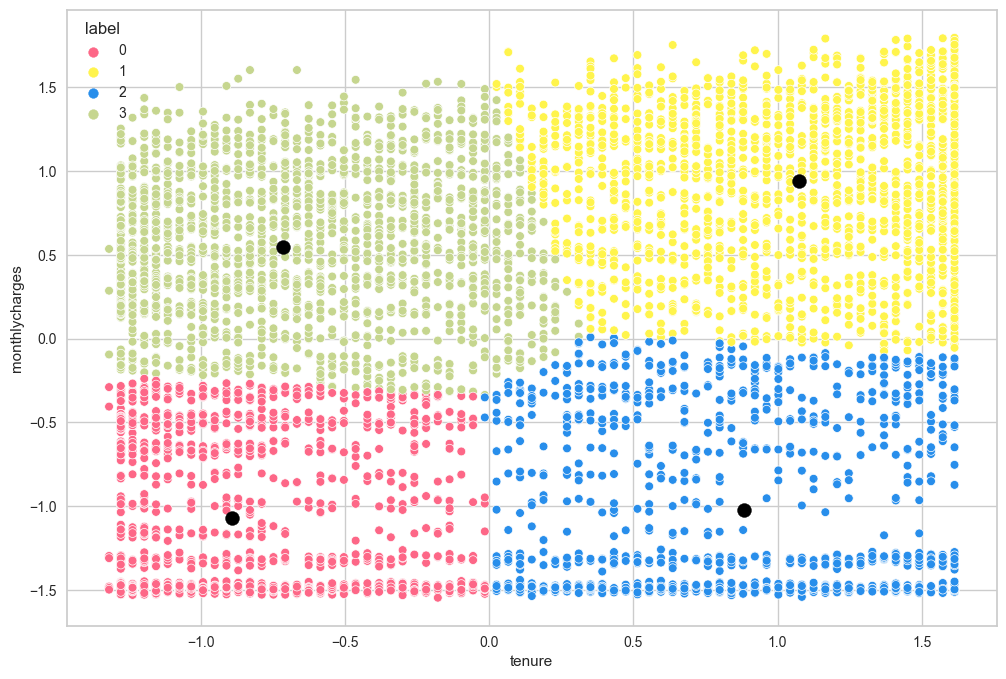

In [25]:
km = KMeans(n_clusters=4, init='k-means++').fit(scaled_data)
km_clustered = scaled_data.copy()
km_clustered.loc[:,'label']=km.labels_
centers = km.cluster_centers_

plt.figure(figsize=(12,8))
sns.scatterplot(data = km_clustered,x= 'tenure',y='monthlycharges',hue='label',palette=['#FD6787','#FFF44C','#288EEB','#C6D68F'],legend='full',markers='s',s=40,c='blue')

plt.scatter(centers[:,0] , centers[:,1] , s = 100, color = 'black')

In [27]:
# size of each cluster
cluster_sizes = km_clustered.groupby('label').size().to_frame()
cluster_sizes.columns = ['Size']
cluster_sizes

,Size
label,
0,1732
1,1953
2,1155
3,2203


Examine the silhouette plot to check the quality of each cluster

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


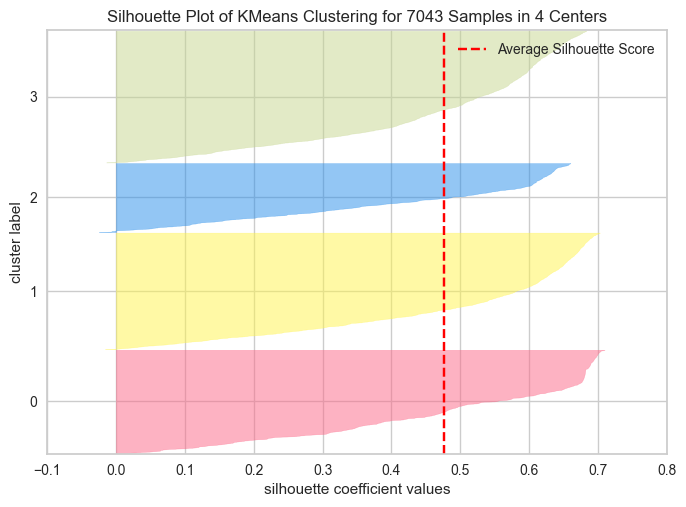

In [26]:
quality_check = KMeans(n_clusters=4)
quality_vis = SilhouetteVisualizer(quality_check,colors=['#FD6787','#FFF44C','#288EEB','#C6D68F'])
quality_vis.fit(scaled_data)
quality_vis.show()
plt.show()